In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('uber.csv')

In [3]:
data.info

<bound method DataFrame.info of         Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199997    27804658   2009-06-29 00:42:00.00000078         30.9   
199998    20259894    2015-05-20 14:56:25.0000004         14.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude  \
0       2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1       2009-07-17 20:04:56 UTC    

In [5]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
data.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [10]:
data.shape

(200000, 9)

In [12]:
data.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [13]:
missing_values=data.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [14]:
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'],errors='coerce')

In [15]:
data=data.dropna()

In [16]:
missing_values=data.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


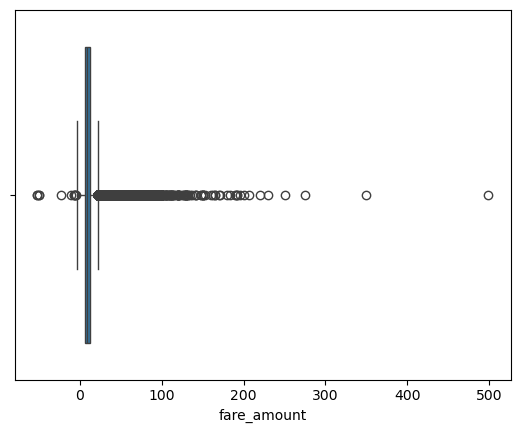

In [38]:
sn.boxplot(x=data['fare_amount'])
plt.show()

In [41]:
q1= data['fare_amount'].quantile(0.25)
q3= data['fare_amount'].quantile(0.75)
IQR = q3-q1

In [42]:
threshold=1.5
lower_bound= q1-threshold*IQR
upper_bound= q3+threshold*IQR

In [43]:
data_no_outliers=data[(data['fare_amount']>=lower_bound)&(data['fare_amount']<=upper_bound)]

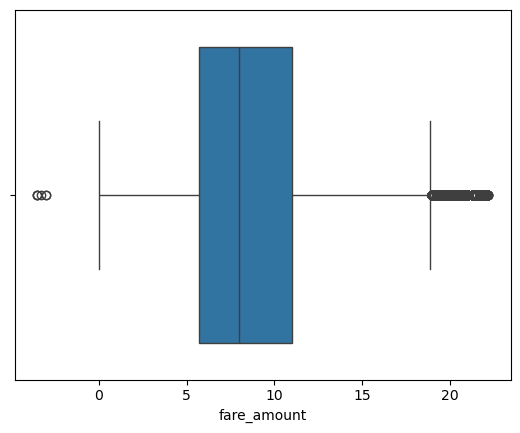

In [44]:
sn.boxplot(x=data_no_outliers['fare_amount'])
plt.show()

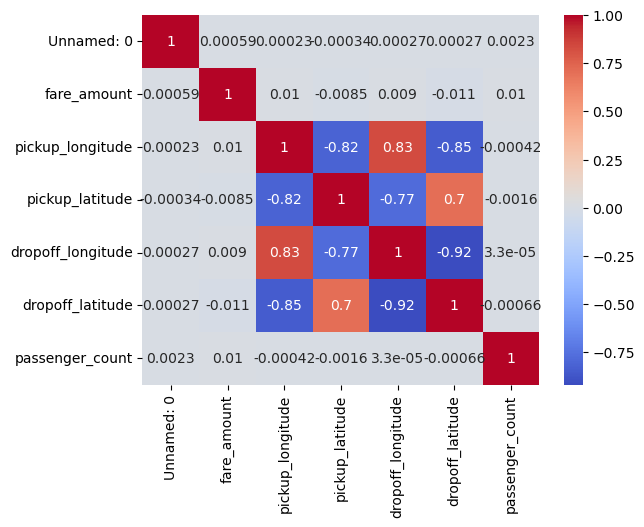

In [45]:
con=data.select_dtypes(include=[np.number])
co_matrix=con.corr()
sn.heatmap(co_matrix,annot=True,cmap='coolwarm')
plt.show()

In [46]:
X=data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude','dropoff_latitude', 'passenger_count']]
y=data['fare_amount']

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lr_model=LinearRegression()

In [51]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [52]:
y_pred_lr=lr_model.predict(X_test)

In [53]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [54]:
print("R2 score: ",r2_score(y_test,y_pred_lr))
print("Mean absolute error: ",mean_absolute_error(y_test,y_pred_lr))
print("MSE: ",mean_squared_error(y_test,y_pred_lr))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred_lr)))
    

R2 score:  0.00034152697863043535
Mean absolute error:  6.068508583048691
MSE:  103.9884071266138
RMSE:  10.197470623964248


In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
rf_model=RandomForestRegressor(n_estimators=50,random_state=42)

In [57]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [34]:
y_pred_rf=rf_model.predict(X_test)

In [35]:
print("R2 score: ",r2_score(y_test,y_pred_rf))
print("Mean absolute error: ",mean_absolute_error(y_test,y_pred_rf))
print("MSE: ",mean_squared_error(y_test,y_pred_rf))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred_rf)))

R2 score:  0.6975220368934889
Mean absolute error:  2.3142596227101335
MSE:  31.46494770287047
RMSE:  5.609362504141667
